In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1

In [92]:
# Reading dataset
df = pd.read_csv("Datasets/dataset.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [93]:
#printing info about dataaset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [94]:
# handling milabeled values
for col in df.columns:
    df[col] = pd.to_numeric(df[col] , errors = 'coerce') 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      760 non-null    float64
 1   f2      760 non-null    float64
 2   f3      760 non-null    int64  
 3   f4      760 non-null    float64
 4   f5      760 non-null    float64
 5   f6      760 non-null    float64
 6   f7      760 non-null    float64
 7   target  760 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 53.4 KB


In [95]:
# data feature
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


## Visualisation

### 1. Heatmap

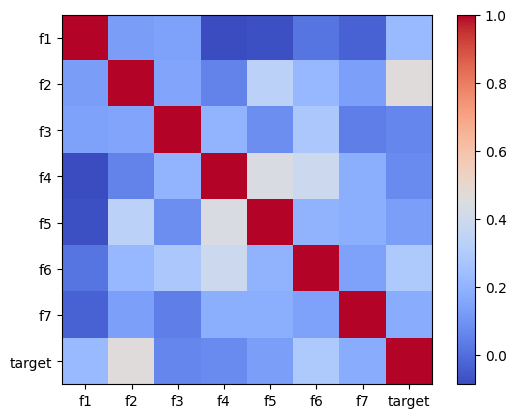

In [96]:
corr = df.corr()
plt.imshow(corr , cmap = 'coolwarm' , interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.yticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.show()

#### 2. Box Plot for Outlinears in every feature

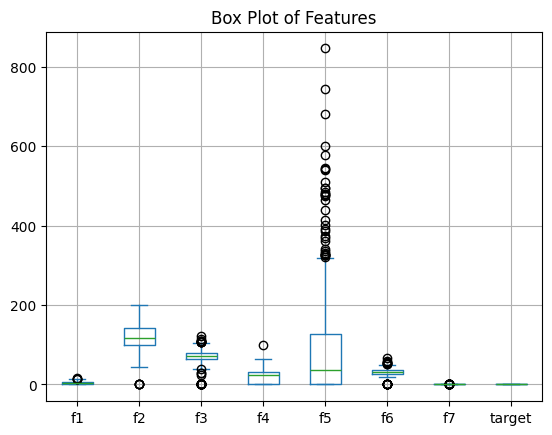

In [97]:
df.plot(kind='box', grid=True)
plt.title('Box Plot of Features')
plt.show()

#### 3. Distribution of Target variable

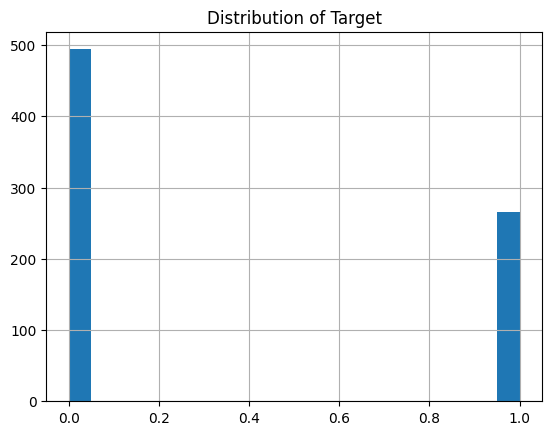

In [98]:
plt.hist(df['target'], bins=20)
plt.grid()
plt.title('Distribution of Target')
plt.show()

### Step 2 - Preprocessing and Splitting Dataset

In [114]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [115]:
feature_col = ["f1" , "f2" , "f3" , "f4" , "f5" , "f6" , "f7"]

In [116]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_col]) , columns=feature_col)
df_scaled["target"] = df["target"]
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1


In [117]:
train_df, val_test_df = train_test_split(df_scaled, test_size=0.3, random_state=16, shuffle=True)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=7, shuffle=True)


In [118]:
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}" )
print(f"Test set size: {len(test_df)}" )

Training set size: 532
Validation set size: 114
Test set size: 114
